In [136]:
# Import all libraries that will be used to make the initial analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go


### 
import os
import time 
import logging 
import threading
import csv
import math


In [137]:
# import Files



data_application_train = pd.read_csv("../../2-data/application_train.csv", header=0)

"""
data_bureau = pd.read_csv("../../2-data/bureau.csv")

data_bureau_balance = pd.read_csv("../../2-data/bureau_balance.csv")
data_credit_card_balance = pd.read_csv("../../2-data/credit_card_balance.csv")
data_POS_CASH_balance = pd.read_csv("../../2-data/POS_CASH_balance.csv")
data_sample_submission = pd.read_csv("../../2-data/sample_submission.csv")
data_bureau = pd.read_csv("../../2-data/bureau.csv")
data_installments_payments = pd.read_csv("../../2-data/installments_payments.csv")
data_previous_application = pd.read_csv("../../2-data/previous_application.csv")
"""




'\ndata_bureau = pd.read_csv("../../2-data/bureau.csv")\n\ndata_bureau_balance = pd.read_csv("../../2-data/bureau_balance.csv")\ndata_credit_card_balance = pd.read_csv("../../2-data/credit_card_balance.csv")\ndata_POS_CASH_balance = pd.read_csv("../../2-data/POS_CASH_balance.csv")\ndata_sample_submission = pd.read_csv("../../2-data/sample_submission.csv")\ndata_bureau = pd.read_csv("../../2-data/bureau.csv")\ndata_installments_payments = pd.read_csv("../../2-data/installments_payments.csv")\ndata_previous_application = pd.read_csv("../../2-data/previous_application.csv")\n'

In [138]:
data_application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
print(data_application_train.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [155]:
filter_fields = ['CODE_GENDER','SK_ID_CURR']
ttl_gender = data_application_train[filter_fields].groupby(['CODE_GENDER']).count()

In [156]:
print(ttl_gender)

             SK_ID_CURR
CODE_GENDER            
F                202448
M                105059
XNA                   4


In [157]:
ttl_gender.reset_index(level=0, inplace=True)
ttl_gender

,CODE_GENDER,SK_ID_CURR
0,F,202448
1,M,105059
2,XNA,4


In [158]:

ttl_gender['COLOR'] = 'grey'
ttl_gender.columns

Index(['CODE_GENDER', 'SK_ID_CURR', 'COLOR'], dtype='object')

In [159]:
female = ttl_gender['CODE_GENDER'] == 'F'
male = ttl_gender['CODE_GENDER'] == 'M'

ttl_gender.loc[female, 'COLOR'] = 'yellow'
ttl_gender.loc[male, 'COLOR'] = 'blue'

ttl_gender.loc[female, 'CODE_GENDER'] = 'Female'
ttl_gender.loc[male, 'CODE_GENDER'] = 'Male'




In [160]:
ttl_gender

,CODE_GENDER,SK_ID_CURR,COLOR
0,Female,202448,yellow
1,Male,105059,blue
2,XNA,4,grey


In [161]:
labels = ttl_gender['CODE_GENDER']
print(labels)

0    Female
1      Male
2       XNA
Name: CODE_GENDER, dtype: object


In [162]:
sizes = ttl_gender['SK_ID_CURR']
print(sizes)

0    202448
1    105059
2         4
Name: SK_ID_CURR, dtype: int64


In [163]:
colors = ttl_gender['COLOR']
print(colors)

0    yellow
1      blue
2      grey
Name: COLOR, dtype: object


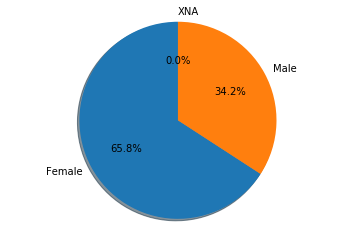

In [165]:

explode = None

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()